# Exploring Ebay Car Sales Data

In this guided project on [Dataquest](https://www.dataquest.io/m/294-guided-project-exploring-ebay-car-sales-data/), we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database). Dataquest has made a few modification from the original dataset: 
- They sampled 50000 data points from the full dataset.
- They dirtied the dataset a bit for practice.


The aim of this project is to clean the data and analyze the included used car listings.

In [1]:
import pandas as pd
import numpy as np

In [2]:
autos = pd.read_csv("autos.csv",encoding = 'Latin-1')

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

- There are 50000 rows and 20 columns. 
- 5 columns are of type int64 and others are of type object. Some columns like 'price','powerPS','odometer' should be converted to numbers in order to do analysis, and some columns like 'dateCrawled','dateCreated' and 'lastSeen' should be converted to datetime. 
- 5 columns have missing data, and we will figure out how to deal with this too.

## Cleaning Column Names

The columns names use [camelcase](https://en.wikipedia.org/wiki/Camel_case) instead of Python's preferred [snakecase](https://en.wikipedia.org/wiki/Snake_case), so let's convert the columns and reword some of the column names based on the data dictionary to be more descriptive

In [5]:
autos.columns

Index([u'dateCrawled', u'name', u'seller', u'offerType', u'price', u'abtest',
       u'vehicleType', u'yearOfRegistration', u'gearbox', u'powerPS', u'model',
       u'odometer', u'monthOfRegistration', u'fuelType', u'brand',
       u'notRepairedDamage', u'dateCreated', u'nrOfPictures', u'postalCode',
       u'lastSeen'],
      dtype='object')

In [6]:
columns_name = {'yearOfRegistration':'registration_year','monthOfRegistration':'registration_month','notRepairedDamage':'unrepaired_damage','dateCreated':'ad_created'}

In [7]:
autos = autos.rename(columns_name, axis = 1)

In [8]:
autos.head(1)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer,registration_month,fuelType,brand,unrepaired_damage,ad_created,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54


In [9]:
import re

In [10]:
def camel_to_snake(text):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', text)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [11]:
autos = autos.rename(camel_to_snake, axis = 1)

In [12]:
autos.head(1)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54


## Inital Exploration and Cleaning

Let's do some basic data exploration to determine what other cleaning tasks need to be done. We will look for:

- Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information.
- Examples of numeric data stored as text which can be cleaned and converted.

In [13]:
autos.describe(include = 'all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-30 17:37:35,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [14]:
autos['seller'].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

In [15]:
autos['offer_type'].value_counts()

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

column 'seller' and 'offer_type' each has mostly one value, so we'll drop these two columns

In [16]:
autos = autos.drop(['seller','offer_type'], axis = 1)

In [17]:
autos['nr_of_pictures'].value_counts()

0    50000
Name: nr_of_pictures, dtype: int64

nr_of_pictures has 0 for every column, so we'll drop this column.

In [18]:
autos = autos.drop('nr_of_pictures', axis = 1)

Next we want to convert 'price' and 'odometer' to numeric values instead of text. For each column, we'll:
- Remove any non-numeric characters.
- convert the column to a numeric dtype.

In [19]:
autos['price'] = autos['price'].str.strip('$').str.replace(',','').astype('float')

In [20]:
autos['odometer_km'] = autos['odometer'].str.strip('km').str.replace(',','').astype('int')

In [21]:
autos = autos.drop('odometer', axis = 1)

## Exploring the odometer and price columns

we want to look for data that doesn't look right. Here's the steps we'll take:
- Analyze the columns using minumum and maximum values and look for any values that look unrealistically high or low that we want to remove.
- Remove outliers.

In [22]:
autos['odometer_km'].unique().shape

(13L,)

In [23]:
autos['odometer_km'].unique()

array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000,   5000, 100000,  40000], dtype=int64)

In [24]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [25]:
autos['odometer_km'].value_counts().sort_index(ascending = True)

5000        967
10000       264
20000       784
30000       789
40000       819
50000      1027
60000      1164
70000      1230
80000      1436
90000      1757
100000     2169
125000     5170
150000    32424
Name: odometer_km, dtype: int64

In [26]:
autos['price'].unique().shape

(2357L,)

In [27]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [28]:
autos['price'].value_counts().sort_index(ascending = True).head(10)

0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
Name: price, dtype: int64

In [29]:
autos['price'].value_counts().sort_index(ascending = False).head(20)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
350000.0      1
345000.0      1
299000.0      1
295000.0      1
265000.0      1
259000.0      1
250000.0      1
220000.0      1
198000.0      1
197000.0      1
Name: price, dtype: int64

It seems there are quite some outliers in 'price' column. There are 1421 cars with \\$0 price, about 2\% of all cars. 

For cars with very high price, there are 14 cars with price more than 350000, so we are going to remove those.

In [30]:
autos = autos[autos['price'].between(1,350001)]

In [31]:
autos.shape

(48565, 17)

## Exploring the date columns

In [32]:
autos[['date_crawled','ad_created','last_seen']].describe()

,date_crawled,ad_created,last_seen
count,48565,48565,48565
unique,46882,76,38474
top,2016-03-08 10:40:35,2016-04-03 00:00:00,2016-04-07 06:17:27
freq,3,1887,8


In [33]:
distributions = {}
for col in ['date_crawled','ad_created','last_seen']:
    col_dist = autos[col].str[:10].value_counts(normalize = True, dropna = False)
    distributions[col] = col_dist.sort_index(ascending = True)

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

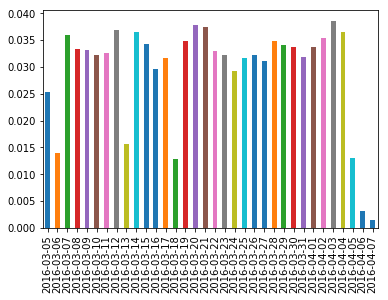

In [35]:
distributions['date_crawled'].plot(kind = 'bar')

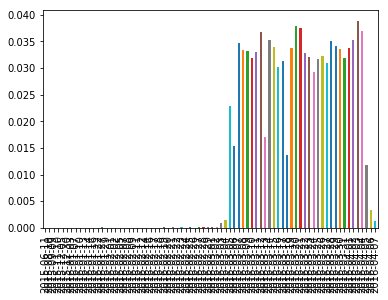

In [36]:
distributions['ad_created'].plot(kind = 'bar')

In [37]:
print(distributions['ad_created'].head(5))
print(distributions['ad_created'].tail(5))

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
Name: ad_created, dtype: float64
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, dtype: float64


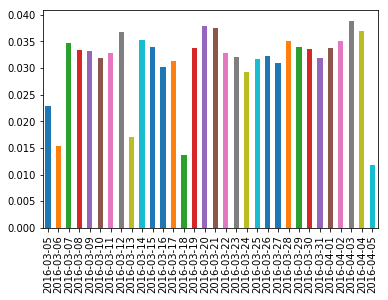

In [38]:
distributions['ad_created'].loc[distributions['ad_created']>0.005].plot(kind = 'bar')

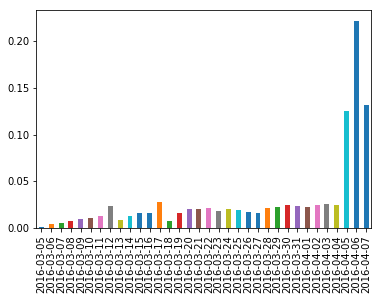

In [39]:
distributions['last_seen'].plot(kind = 'bar')

- data was crawled and last seen between 2016-3-5 and 2016-4-7. 
- data was created between 2015-6-11 to 2016-4-7, which is a much wider range. But most data was created between 2016-3-5 to 2016-4-5

In [40]:
autos['registration_year'].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

## Dealing with incorrect registration year data

In [41]:
autos['registration_year'].value_counts().sort_index(ascending = True)

1000       1
1001       1
1111       1
1800       2
1910       5
1927       1
1929       1
1931       1
1934       2
1937       4
1938       1
1939       1
1941       2
1943       1
1948       1
1950       3
1951       2
1952       1
1953       1
1954       2
1955       2
1956       4
1957       2
1958       4
1959       6
1960      23
1961       6
1962       4
1963       8
1964      12
        ... 
2000    3156
2001    2636
2002    2486
2003    2699
2004    2703
2005    2936
2006    2670
2007    2277
2008    2215
2009    2085
2010    1589
2011    1623
2012    1310
2013     803
2014     663
2015     392
2016    1220
2017    1392
2018     470
2019       2
2800       1
4100       1
4500       1
4800       1
5000       4
5911       1
6200       1
8888       1
9000       1
9999       3
Name: registration_year, Length: 95, dtype: int64

In [42]:
autos['registration_year'].between(1900, 2016).sum()/float(autos.shape[0])

0.961206630289303

About 4% of listing cars fall outside the 1900-2016 interval, so we are going to remove these rows.

In [43]:
autos = autos[autos['registration_year'].between(1900,2016)]

In [44]:
autos.shape

(46681, 17)

In [45]:
autos['registration_year'].value_counts(normalize = True).sort_values(ascending = False).head(10)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: registration_year, dtype: float64

Most cars were registrated between 1998-2007

## Exploring price by brand

In [46]:
brand_pcg = autos['brand'].value_counts(normalize = True)

In [47]:
brand_pcg[brand_pcg > 0.05]

volkswagen       0.211264
bmw              0.110045
opel             0.107581
mercedes_benz    0.096463
audi             0.086566
ford             0.069900
Name: brand, dtype: float64

6 brands have listing percentages more than 5%, and we will focus on these brands.

In [48]:
brands = brand_pcg[brand_pcg > 0.05].index.tolist()          

In [49]:
brands = [str(item) for item in brands]

In [50]:
brands

['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford']

In [51]:
brands_price = {}
for brand in brands:
    autos_brand = autos[autos['brand'] == brand]
    price = autos_brand['price'].mean()
    brands_price[brand] = int(price)

In [52]:
brands_price

{'audi': 9336,
 'bmw': 8332,
 'ford': 3749,
 'mercedes_benz': 8628,
 'opel': 2975,
 'volkswagen': 5402}

'audi' has the highest mean price, while 'opel' has the lowest mean price

## Storing Aggregate Data in a DataFrame

We observed that in the top 6 brands, there's a distinct price gap. 
- Audi, BMW and Mercedes Benz are more expensive.
- Ford and Opel are less expensive
- Volkswagen is in between

We want to use aggregation to understand the average mileage for those cars and see if there's any visible link with mean price.

In [53]:
brands_mileage = {}
for brand in brands:
    autos_brand = autos[autos['brand'] == brand]
    mileage = autos_brand['odometer_km'].mean()
    brands_mileage[brand] = int(mileage)

In [54]:
brands_price_series = pd.Series(brands_price)
brands_price_series

audi             9336
bmw              8332
ford             3749
mercedes_benz    8628
opel             2975
volkswagen       5402
dtype: int64

In [55]:
brands_mileage_series = pd.Series(brands_mileage)
brands_mileage_series

audi             129157
bmw              132572
ford             124266
mercedes_benz    130788
opel             129310
volkswagen       128707
dtype: int64

In [56]:
brands_info = pd.DataFrame(brands_price_series, columns = ['mean_price'])
brands_info

,mean_price
audi,9336
bmw,8332
ford,3749
mercedes_benz,8628
opel,2975
volkswagen,5402


In [57]:
brands_info['mean_mileage'] = brands_mileage_series

In [58]:
brands_info

,mean_price,mean_mileage
audi,9336,129157
bmw,8332,132572
ford,3749,124266
mercedes_benz,8628,130788
opel,2975,129310
volkswagen,5402,128707


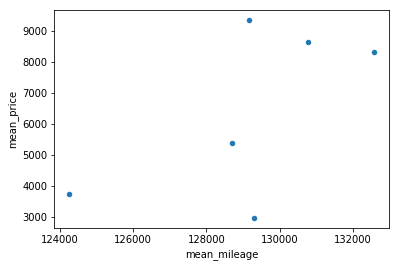

In [59]:
brands_info.plot(x = 'mean_mileage', y = 'mean_price', kind = 'scatter')

There seems to be a trend that more average mileage relates with higher mean price, but there is an exception for 'opel'. 

Let's see if 'opel' has relative too many old cars or too many cheap cars.

In [60]:
for brand in brands:
    early_nums = autos[(autos['brand']==brand) & (autos['registration_year']<1990)].shape[0]
    print(str(early_nums) + ' ' + brand+' vehicles registrated before 1900')

290 volkswagen vehicles registrated before 1900
91 bmw vehicles registrated before 1900
84 opel vehicles registrated before 1900
250 mercedes_benz vehicles registrated before 1900
48 audi vehicles registrated before 1900
87 ford vehicles registrated before 1900


In [61]:
for brand in brands:
    cheap_nums = autos[(autos['brand']==brand) & (autos['price']<200)].shape[0]
    print(str(cheap_nums) + ' ' + brand+' vehicles had listing price less than 200')

190 volkswagen vehicles had listing price less than 200
43 bmw vehicles had listing price less than 200
173 opel vehicles had listing price less than 200
33 mercedes_benz vehicles had listing price less than 200
30 audi vehicles had listing price less than 200
116 ford vehicles had listing price less than 200


In [62]:
brands_info.sort_values(by = 'mean_price')

,mean_price,mean_mileage
opel,2975,129310
ford,3749,124266
volkswagen,5402,128707
bmw,8332,132572
mercedes_benz,8628,130788
audi,9336,129157


more volkswagen, opel and ford had cheap listing price, this could be a reason why they have lower mean price than the other three